In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
import seaborn as sns
import re
import itertools
from skimpy import clean_columns
import pycountry_convert as pc
import pycountry
import scipy.stats as stats
from math import sqrt
import plotly.graph_objects as go
import seaborn.objects as so
from matplotlib.ticker import PercentFormatter
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('')

In [3]:
df1=df.copy()

In [4]:
df1

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.710,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.190,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.830,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.590,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.280,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.960,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.580,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.170,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.670,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [5]:
df1.shape

(27820, 12)

In [6]:
df1

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.710,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.190,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.830,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.590,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.280,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.960,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.580,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.170,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.670,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [7]:
df1.drop(df1.columns[7:9],axis=1,inplace=True)

In [ ]:
df1.sample(10)

In [ ]:
df1.drop('country-year',axis=1,inplace=True)

In [10]:
df1 = clean_columns(df1)
df1.columns.tolist()

3 column names have been cleaned

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides_100k_pop',
 'gdp_for_year_$',
 'gdp_per_capita_$',
 'generation']

In [11]:

df1['new_age'] = df1.age.str.extract(r'^(\d+)')

In [12]:
df1.sample(10)

,country,year,sex,age,suicides_no,population,suicides_100k_pop,gdp_for_year_$,gdp_per_capita_$,generation,new_age
3322,Belarus,2001,male,75+ years,82,116090,70.630,"12,354,820,144",1299,Silent,75
16736,Mexico,1999,male,35-54 years,668,9064400,7.370,"600,232,874,043",6800,Boomers,35
25466,Trinidad and Tobago,1997,female,5-14 years,0,130641,0.000,"5,737,751,332",4937,Millenials,5
9978,Germany,2012,female,75+ years,607,4920842,12.340,"3,543,983,909,148",45142,Silent,75
5322,Chile,1989,male,5-14 years,11,1280000,0.860,"29,885,685,143",2599,Generation X,5
21903,Saint Vincent and Grenadines,2013,male,25-34 years,0,8863,0.000,"721,207,148",7183,Millenials,25
4398,Brazil,2003,male,5-14 years,60,17794355,0.340,"558,319,920,832",3376,Millenials,5
5321,Chile,1989,female,55-74 years,12,715000,1.680,"29,885,685,143",2599,G.I. Generation,55
3834,Belize,1987,male,55-74 years,0,5866,0.000,"276,550,000",1920,G.I. Generation,55
3899,Belize,1995,male,15-24 years,4,23500,17.020,"620,140,400",3436,Generation X,15


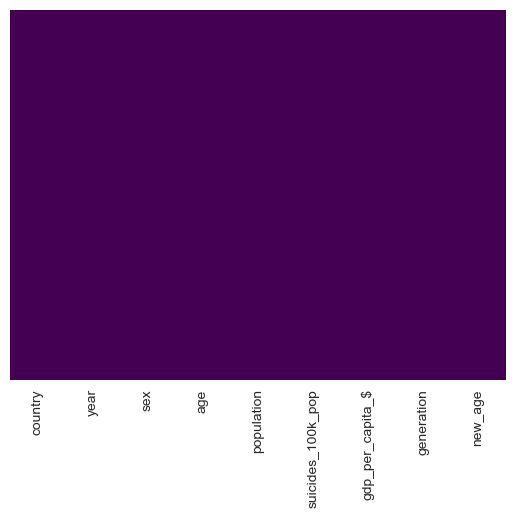

In [17]:
sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap='viridis');


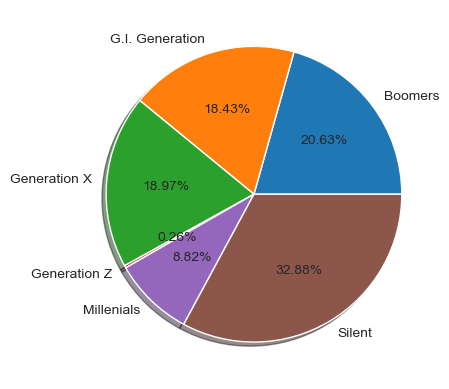

In [18]:
suicide_by_generation=df1.groupby('generation')['suicides_100k_pop'].sum()

plt.pie(x=suicide_by_generation, labels=suicide_by_generation.index, autopct='%.2f%%',shadow=True);

In [19]:
df1

,country,year,sex,age,population,suicides_100k_pop,gdp_per_capita_$,generation,new_age
0,Albania,1987,male,15-24 years,312900,6.710,796,Generation X,15
1,Albania,1987,male,35-54 years,308000,5.190,796,Silent,35
2,Albania,1987,female,15-24 years,289700,4.830,796,Generation X,15
3,Albania,1987,male,75+ years,21800,4.590,796,G.I. Generation,75
4,Albania,1987,male,25-34 years,274300,3.280,796,Boomers,25
...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,3620833,2.960,2309,Generation X,35
27816,Uzbekistan,2014,female,75+ years,348465,2.580,2309,Silent,75
27817,Uzbekistan,2014,male,5-14 years,2762158,2.170,2309,Generation Z,5
27818,Uzbekistan,2014,female,5-14 years,2631600,1.670,2309,Generation Z,5


In [20]:
df1.sample(10)

,country,year,sex,age,population,suicides_100k_pop,gdp_per_capita_$,generation,new_age
12275,Ireland,2003,male,55-74 years,304682,18.710,44473,Silent,55
3298,Belarus,1999,male,35-54 years,1378000,85.490,1269,Boomers,35
3729,Belgium,2009,male,35-54 years,1576175,40.920,47630,Boomers,35
21570,Saint Lucia,2009,male,5-14 years,14963,0.000,7902,Generation Z,5
16893,Mexico,2012,female,15-24 years,11076558,3.670,10982,Millenials,15
10044,Greece,1986,female,5-14 years,681800,0.000,6040,Generation X,5
12010,Iceland,2013,male,75+ years,8368,59.750,51749,Silent,75
12868,Italy,1991,female,25-34 years,4401300,3.230,22805,Boomers,25
14011,Kazakhstan,2012,female,5-14 years,1198748,0.580,13845,Generation Z,5
25639,Turkey,2009,male,25-34 years,6272520,3.010,9773,Generation X,25


In [80]:
custom_country_mapping = {
    'Republic of Korea': 'KR',  
    'Saint Vincent and Grenadines': 'VC',  
}


def country_to_continent(country_name):
    if country_name in custom_country_mapping:
        country_alpha2 = custom_country_mapping[country_name]
    else:
        try:
            country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        except ValueError:
            return 'Unknown'

    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name


In [81]:
df1['continent'] = df1['country'].apply(country_to_continent)

In [82]:
df1.sample(10)

,country,year,sex,age,suicides_no,population,suicides_100k_pop,gdp_for_year_$,gdp_per_capita_$,generation,new_age,continent
92,Albania,1996,male,55-74 years,3,179900,1.670,"3,314,898,292",1127,Silent,55,Europe
5310,Chile,1988,female,5-14 years,6,1224000,0.490,"26,040,229,793",2303,Generation X,5,South America
21018,Russian Federation,1995,male,5-14 years,355,11854400,2.990,"395,531,066,563",2844,Millenials,5,Europe
4027,Belize,2005,male,75+ years,0,1582,0.000,"1,114,222,550",4547,Silent,75,North America
20113,Qatar,2007,male,25-34 years,13,259649,5.010,"79,712,087,912",71460,Generation X,25,Asia
479,Antigua and Barbuda,2004,male,75+ years,0,1094,0.000,"919,577,148",11535,Silent,75,North America
21892,Saint Vincent and Grenadines,2012,female,55-74 years,0,6253,0.000,"692,933,741",6918,Boomers,55,North America
13491,Japan,1995,female,35-54 years,1984,17984000,11.030,"5,449,116,304,981",46043,Boomers,35,Asia
12766,Israel,2014,male,55-74 years,54,577076,9.360,"308,416,982,140",41869,Boomers,55,Asia
25803,Turkmenistan,1993,female,5-14 years,2,463900,0.430,"3,179,225,949",954,Millenials,5,Asia


# Global

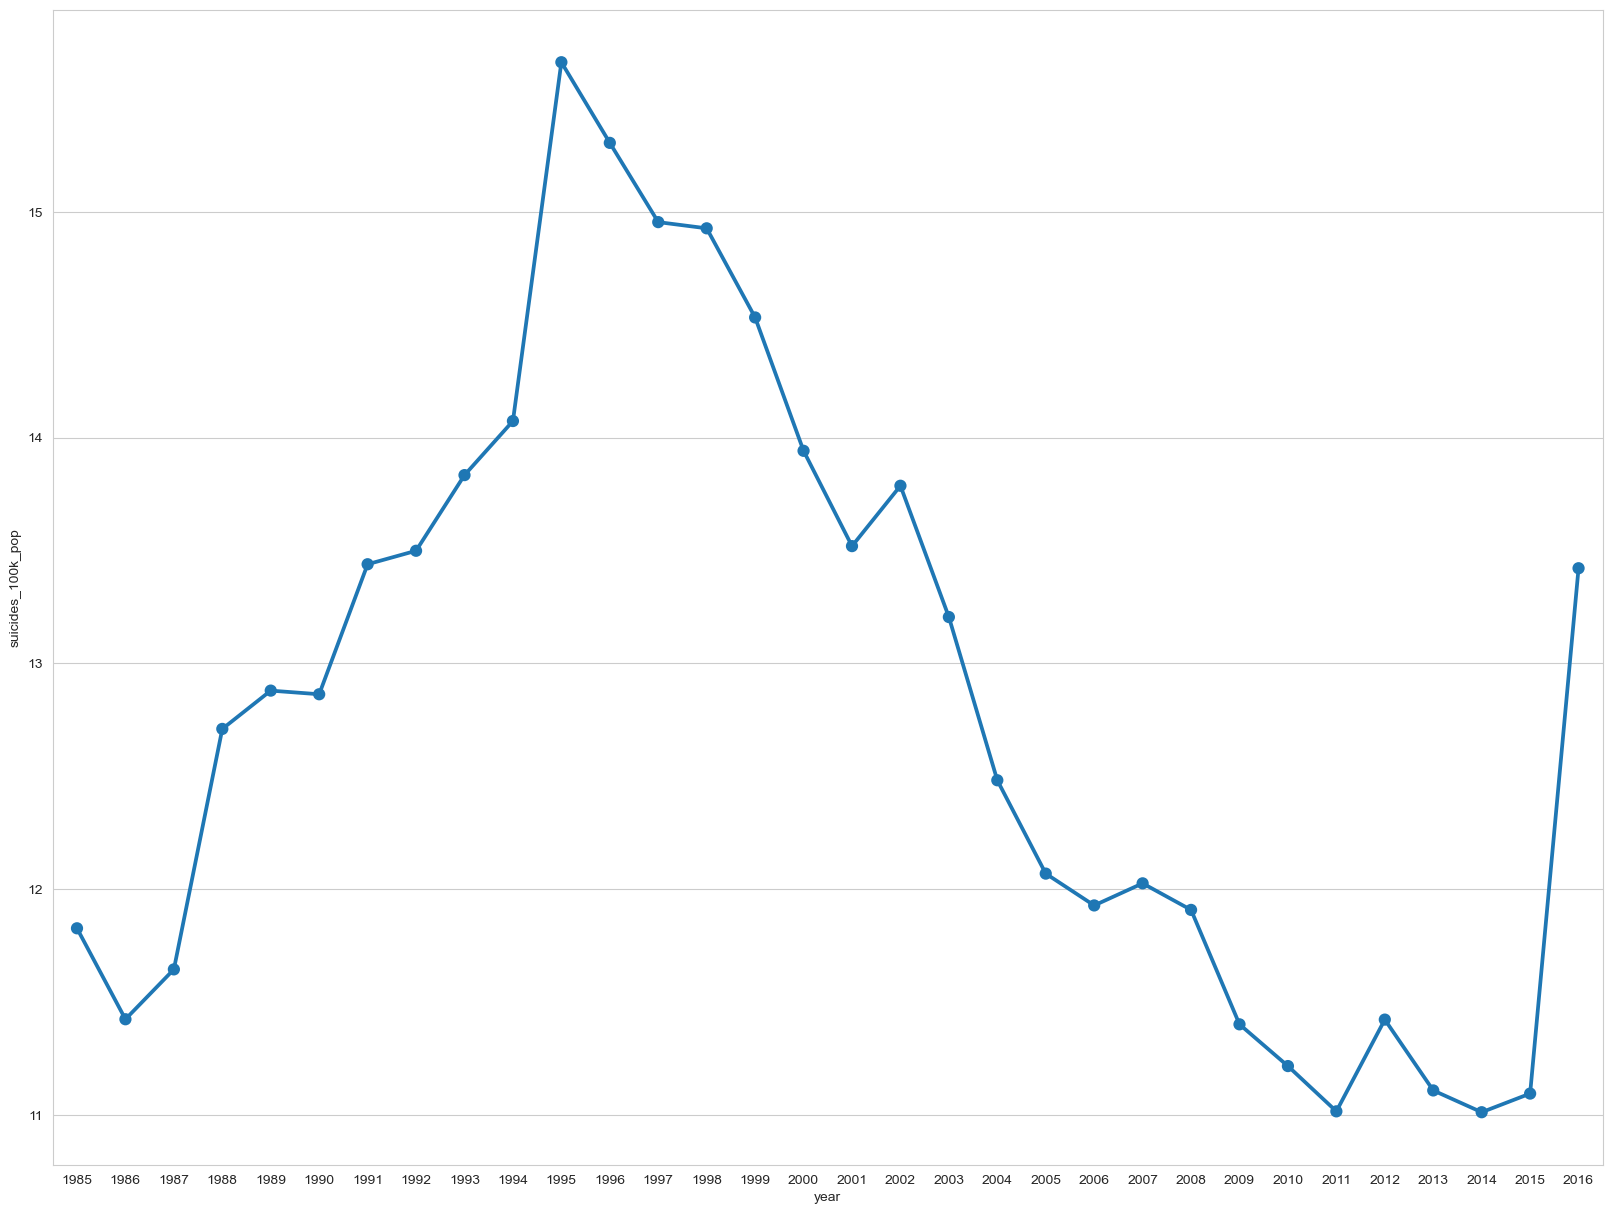

In [24]:

fig, ax = plt.subplots(nrows= 1, ncols = 1, figsize=(20,15))

marker = itertools.cycle(['o', '^', '*', '8', 's', 'p', 'd', 'v'])
markers = [next(marker) for i in df1["suicides_100k_pop"].unique()]

line = itertools.cycle(['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted'])
lines = [next(line) for i in df1["suicides_100k_pop"].unique()]
sns.pointplot(data=df1,x = df1.year,y = df1.suicides_100k_pop,ci=None,markers=markers,linestyles=lines)
plt.show()

# By Continent

/Users/hamzaensar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


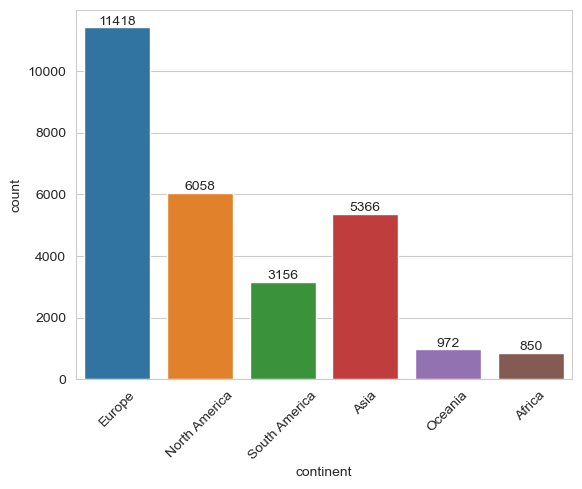

In [25]:
fig, ax = plt.subplots()

sns.countplot(df1.continent)

for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=45)
plt.show()

/Users/hamzaensar/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


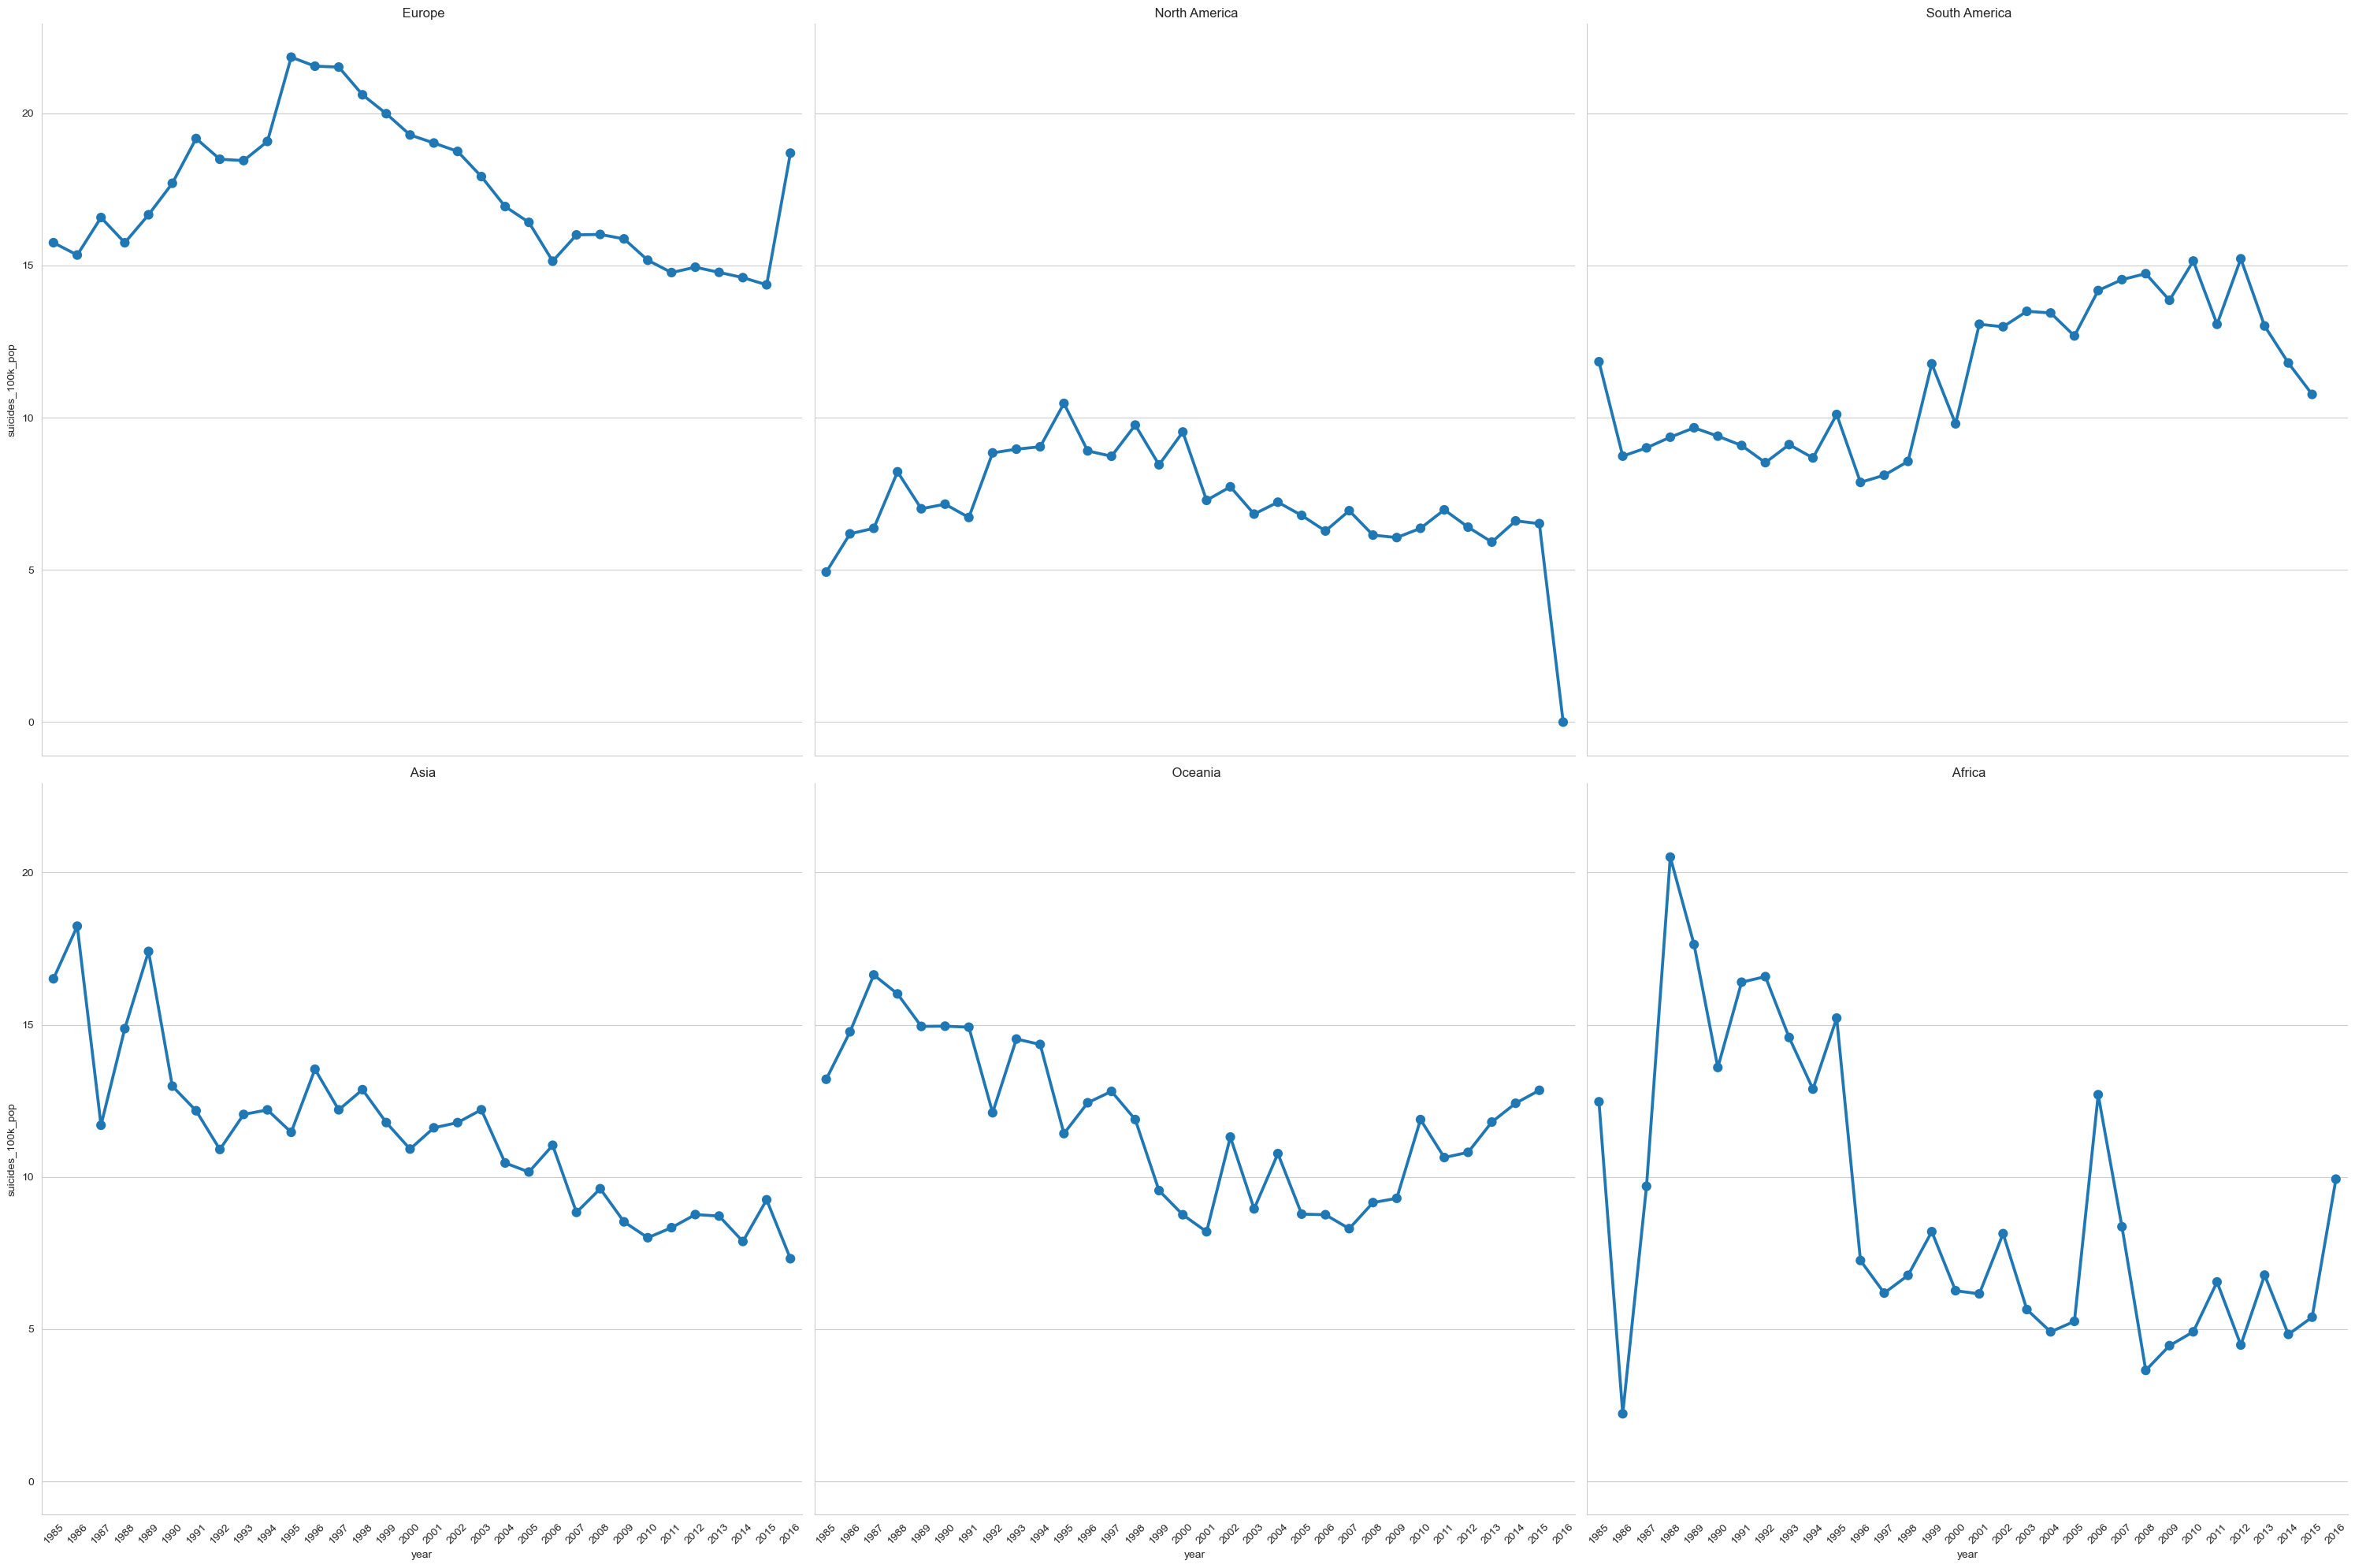

In [26]:

g = sns.FacetGrid(df1, col='continent', col_wrap=3,height=10)

g.map(sns.pointplot, 'year', 'suicides_100k_pop', ci=None)

g.set_xticklabels(rotation=45)

for ax in g.axes:
    ax.set_title(ax.get_title().replace("continent =", ""))
plt.tight_layout()
plt.show()

# By Gender

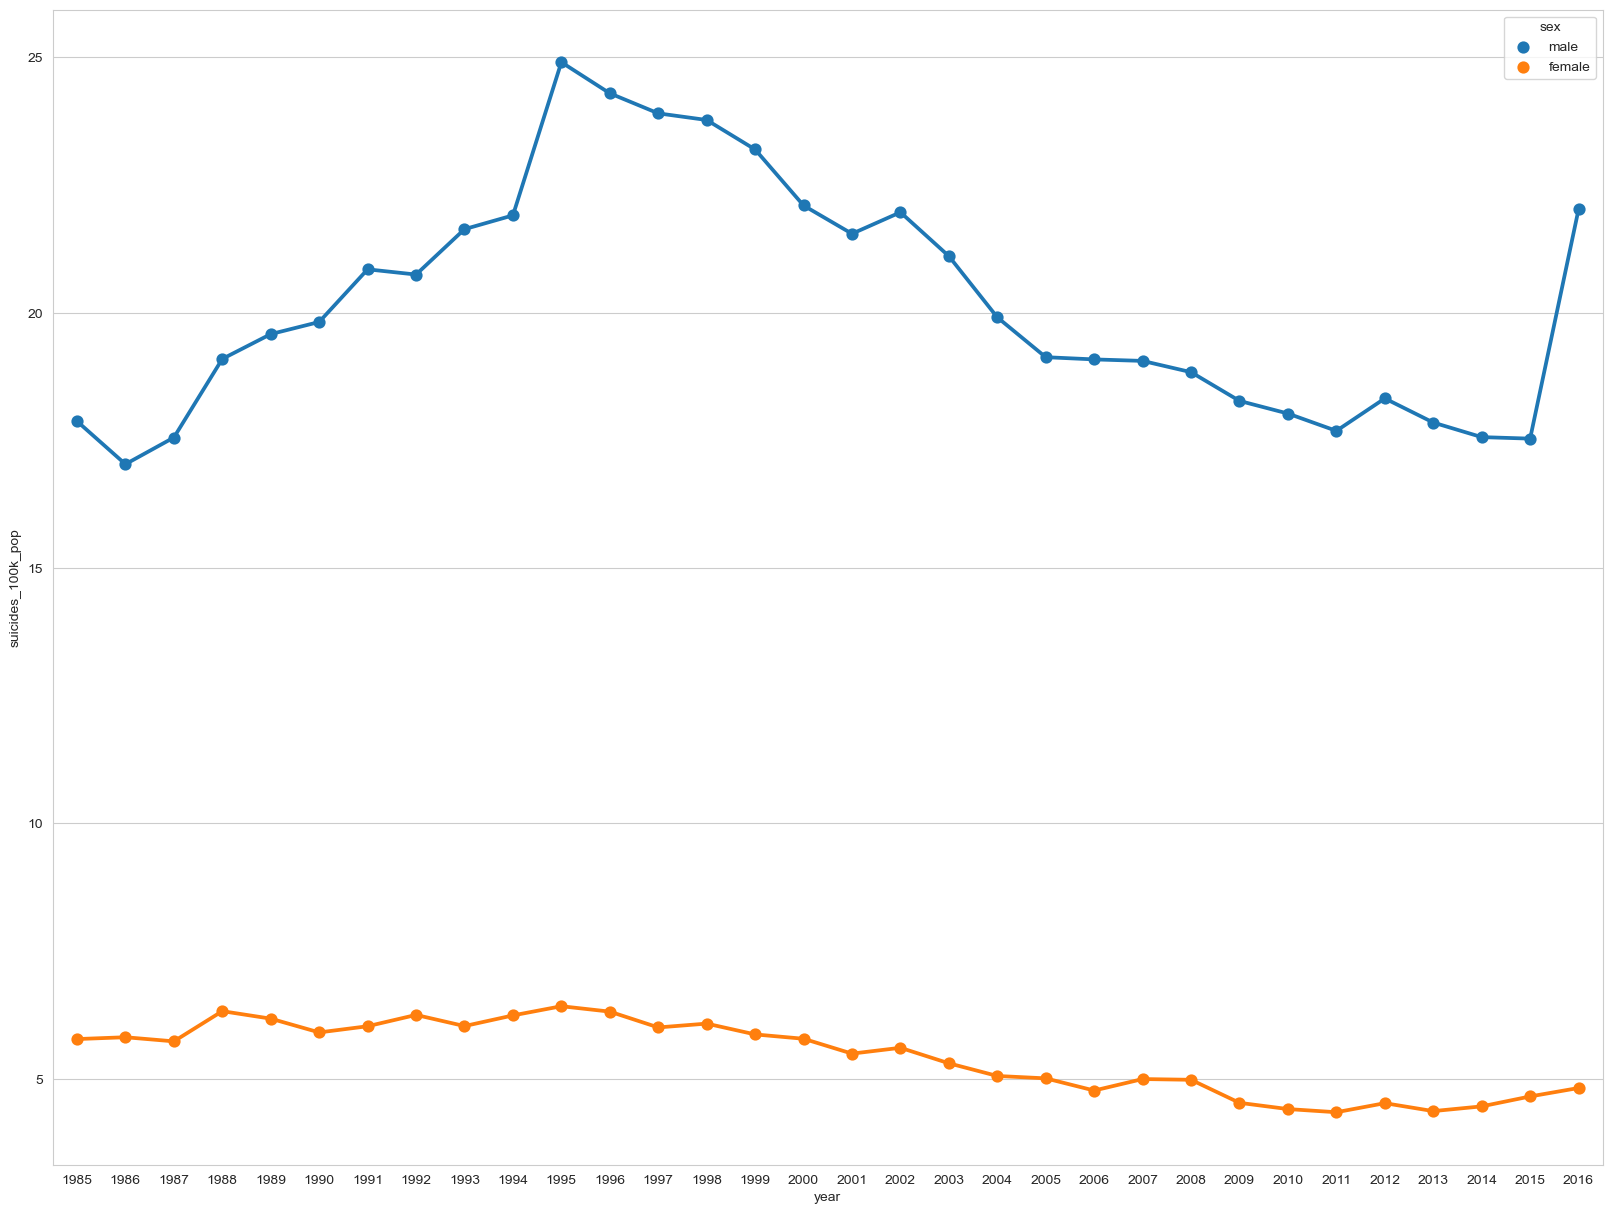

In [27]:
fig, ax = plt.subplots(nrows= 1, ncols = 1, figsize=(20,15))

marker = itertools.cycle(['o', '^', '*', '8', 's', 'p', 'd', 'v'])
markers = [next(marker) for i in df1["suicides_100k_pop"].unique()]

line = itertools.cycle(['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted'])
lines = [next(line) for i in df1["suicides_100k_pop"].unique()]

sns.pointplot(data=df1,x = df1.year,y = df1.suicides_100k_pop,ci=None,hue='sex');





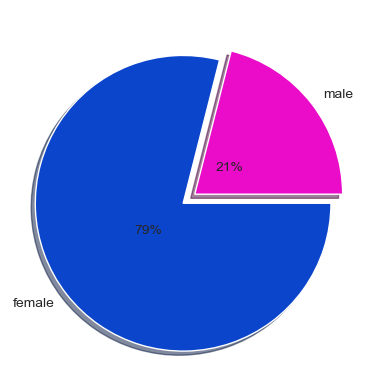

In [28]:
sex_counts = df1['sex'].value_counts()
suicides_by_gender = df1.groupby('sex')['suicides_100k_pop'].sum()


plt.pie(x=suicides_by_gender,labels=sex_counts.index,autopct='%.0f%%',
         explode = [0, 0.1],
       colors = ["#EA0CC8", "#0B45CB"],
       
       pctdistance=0.3,
       shadow = True);

# By Age 

<AxesSubplot:xlabel='age', ylabel='suicides_100k_pop'>

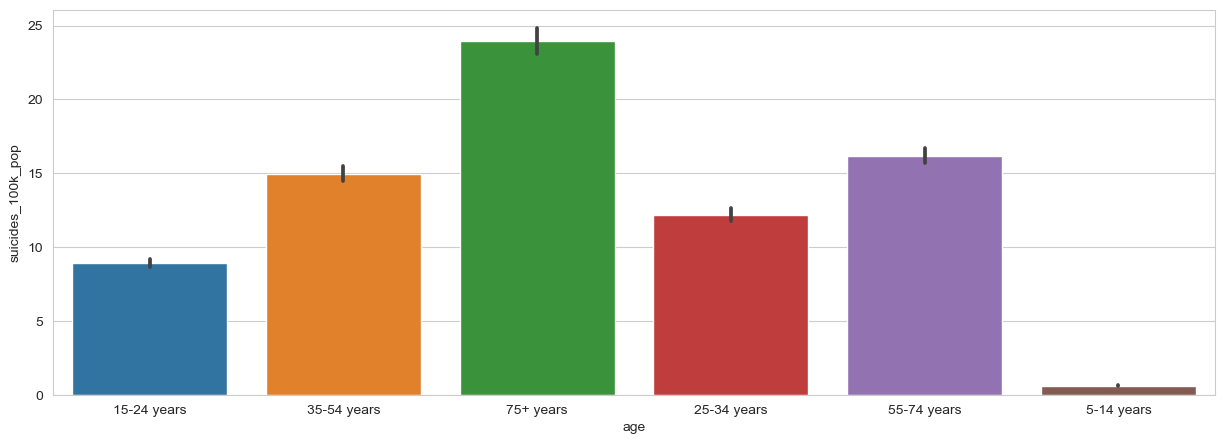

In [29]:


fig = plt.figure(figsize=(15,5))

sns.barplot(data=df1,x = df1.age, y = df1.suicides_100k_pop)


In [ ]:
fig, ax = plt.subplots(nrows= 1, ncols = 1, figsize=(20,15))

marker = itertools.cycle(['o', '^', '*', '8', 's', 'p', 'd', 'v'])
markers = [next(marker) for i in df1["suicides_100k_pop"].unique()]

line = itertools.cycle(['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted'])
lines = [next(line) for i in df1["suicides_100k_pop"].unique()]

sns.pointplot(data=df1,x = df1.year,y = df1.suicides_100k_pop,ci=None,hue='age',markers=markers,linestyles=lines)
plt.show()

# By Country

# By Continent

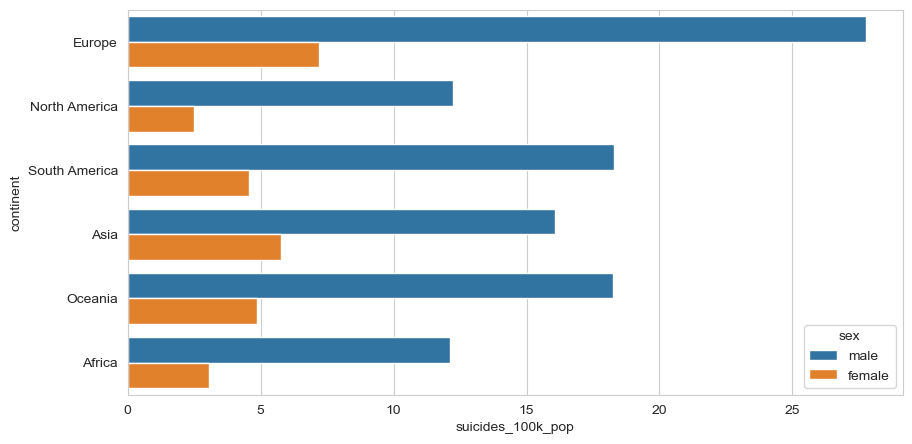

In [101]:


fig = plt.figure(figsize=(10,5))

sns.barplot(data=df1,x = df1.suicides_100k_pop, y = df1.continent,hue=df1.sex,errorbar=None);


### Insights

- European men were at the highest risk between 1985 - 2015, at ~ 30 suicides (per 100k, per year)
- Asia had the smallest overrepresentation of male suicide - the rate was ~2.5x as high for men
- Comparatively, Europe’s rate was ~3.9x as high for men

# Gender differences, by Country

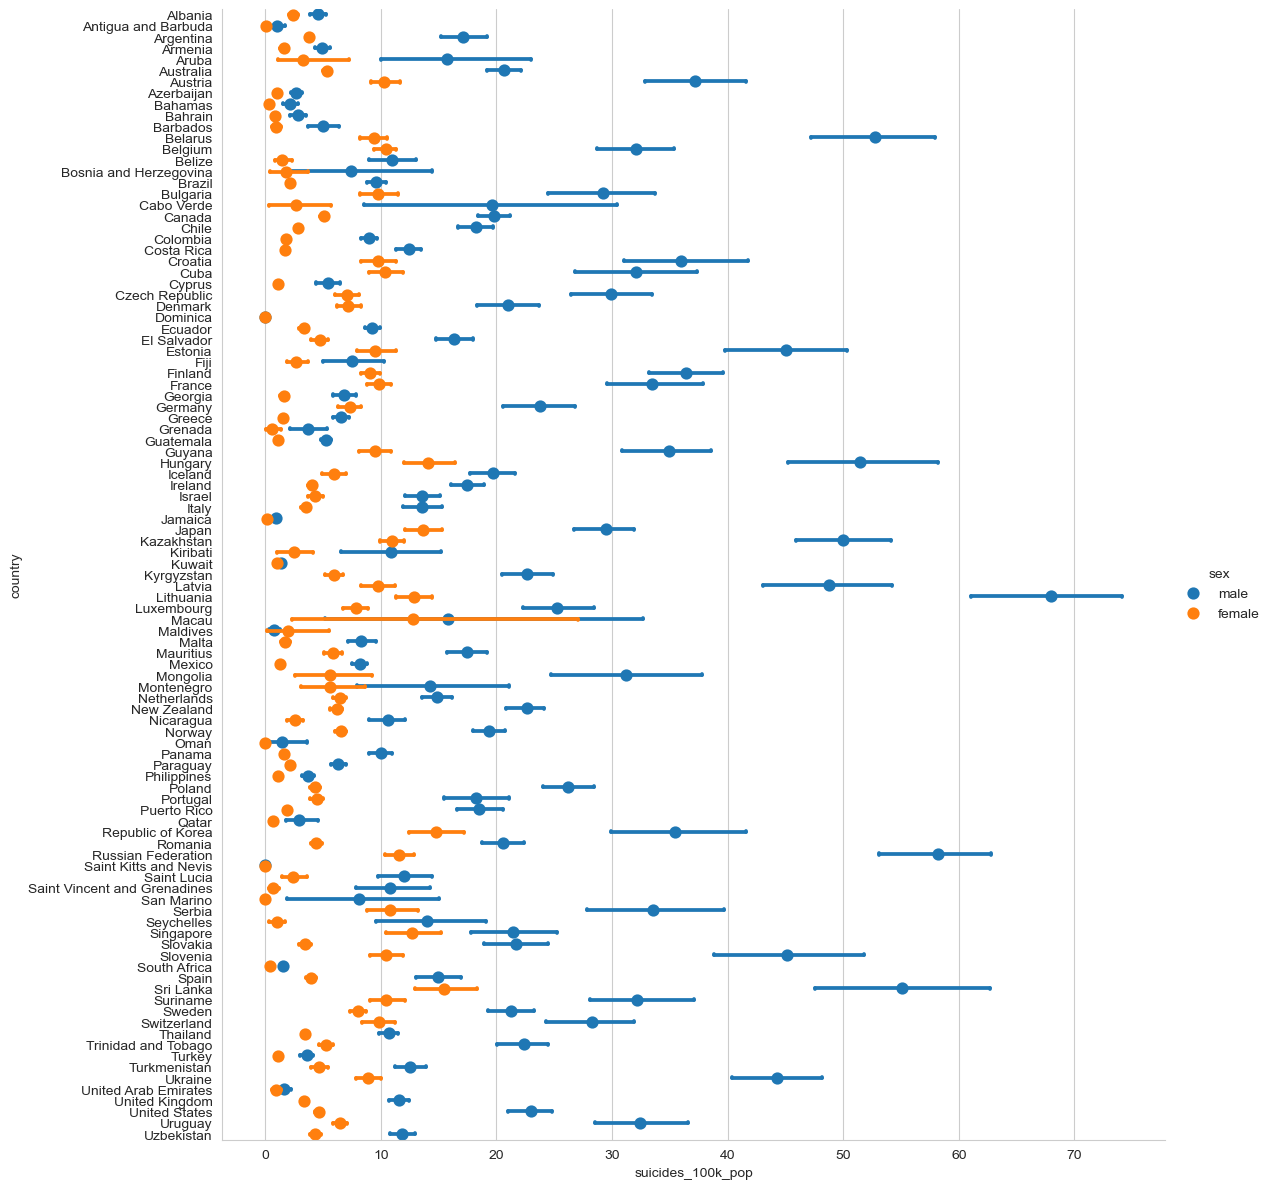

In [67]:
sns.catplot(x='suicides_100k_pop', y='country', data=df1, kind='point',hue='sex', dodge=True, join=False, capsize=0.1, height=12);


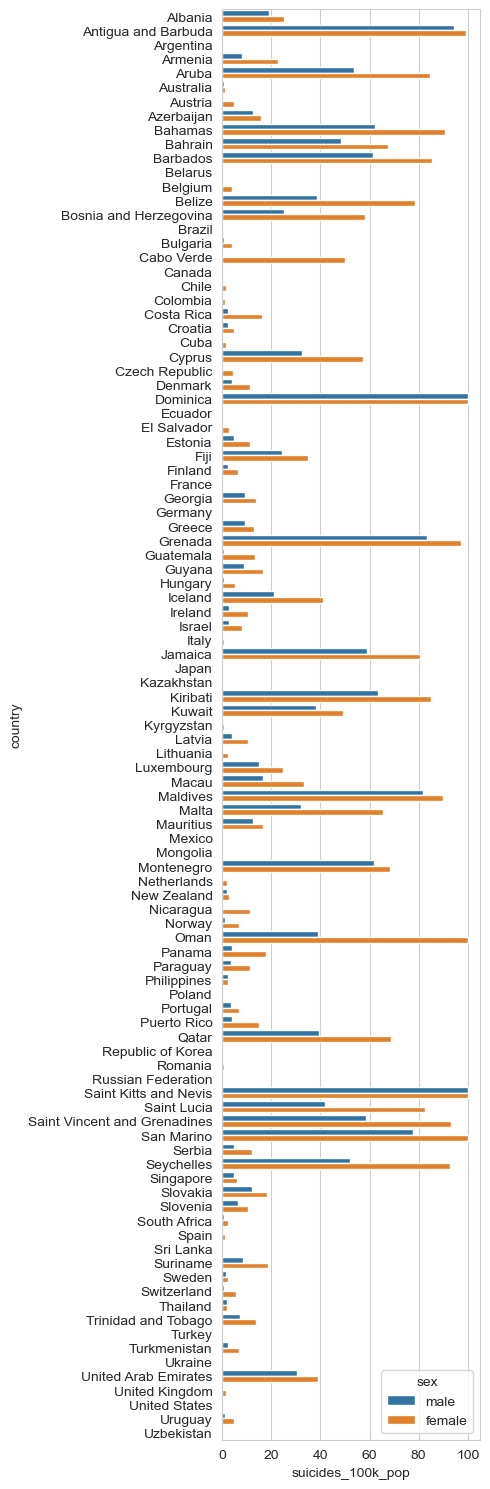

In [114]:
fig = plt.figure(figsize=(5,15))

sns.barplot(x=df1.suicides_100k_pop, y=df1.country, data=df1,hue=df1.sex, estimator=lambda y: sum(y==0)*100.0/len(y),errorbar=None)
plt.tight_layout()
plt.show()

## Insights
- The overrepresentation of men in suicide deaths appears to be universal, and can be observed to differing extents in every country
- Whilst women are more likely to suffer from depression and suicidal thoughts, men are more likely to die from suicide
- This is known as the gender paradox on suicidal behaviour

 # Age differences, by Continent

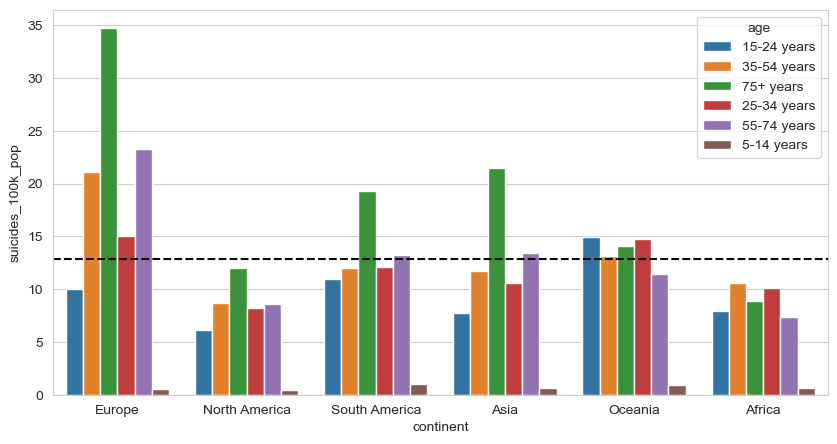

In [123]:


fig = plt.figure(figsize=(10,5))

sns.barplot(data=df1,x = df1.continent, y = df1.suicides_100k_pop,hue=df1.age,errorbar=None)

plt.axhline(y=df1.suicides_100k_pop.mean(), color='black', linestyle='--');

### Insights
- For the America, Asia & Europe (which make up most of the dataset), suicide rate increases with age
- Oceania & Africa’s rates are highest for those aged 25 - 34